
# Normal Distributions and Z-Scores

This notebook explores the theoretical and practical aspects of **Normal Distributions** and **Z-Scores** based on the provided PDF content. Real-world examples are included to enhance understanding, with an additional case study on T-shirt order fulfillment.

---



## What is a Normal Distribution?

A **Normal Distribution** is a symmetric, bell-shaped curve representing data distribution where most observations cluster around the mean. Key properties include:
- Symmetry about the mean.
- Mean = Median = Mode.
- Defined by the mean (μ) and standard deviation (σ).

### Visualization of a Normal Distribution


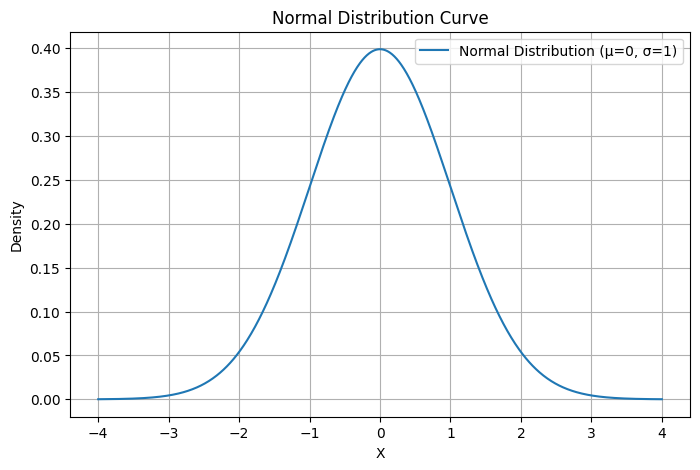

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Generate data for normal distribution


x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, loc=0, scale=1)



# Plot the normal distribution

plt.figure(figsize=(8, 5))


plt.plot(x, y, label="Normal Distribution (μ=0, σ=1)")


plt.title("Normal Distribution Curve")


plt.xlabel("X")


plt.ylabel("Density")


plt.legend()


plt.grid()


plt.show()


## The Empirical Rule

The **Empirical Rule**, or the 68-95-99.7 rule, explains the spread of data in a normal distribution:
- 68% of data lies within 1 standard deviation of the mean.
- 95% of data lies within 2 standard deviations of the mean.
- 99.7% of data lies within 3 standard deviations of the mean.

### Visualization of the Empirical Rule


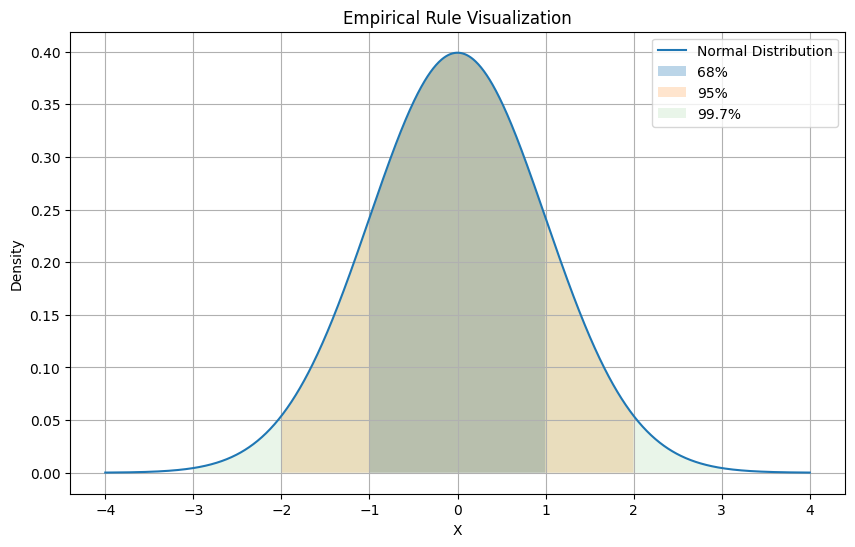

In [3]:

# Define standard deviations
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, loc=0, scale=1)

# Plot with standard deviation regions
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Normal Distribution")
plt.fill_between(x, y, where=(x >= -1) & (x <= 1), alpha=0.3, label="68%")
plt.fill_between(x, y, where=(x >= -2) & (x <= 2), alpha=0.2, label="95%")
plt.fill_between(x, y, where=(x >= -3) & (x <= 3), alpha=0.1, label="99.7%")
plt.title("Empirical Rule Visualization")
plt.xlabel("X")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()



## Percentiles and Z-Scores

- A **Percentile** represents the percentage of data below a given point in the distribution.
- A **Z-Score** measures the number of standard deviations a data point is from the mean.

### Formula for Z-Score
\[ z = \frac{x - \mu}{\sigma} \]

Where:
- \( x \): Data point
- \( \mu \): Mean
- \( \sigma \): Standard deviation

### Example Calculation of Z-Score


In [4]:

# Example: Calculate Z-Score
x = 75  # Data point
mu = 70  # Mean
sigma = 5  # Standard deviation

z = (x - mu) / sigma
print(f"The Z-Score for x={x} is: {z:.2f}")


The Z-Score for x=75 is: 1.00


# Blinkit Use Case: Optimizing Delivery Times with Normal Distribution

## Scenario
Blinkit wants to improve customer satisfaction by ensuring that most deliveries are completed within a target time. Delivery times are assumed to follow a **normal distribution** with:
- **Mean delivery time (μ)**: 15 minutes
- **Standard deviation (σ)**: 3 minutes

---

## Objective
1. Identify the percentage of orders delivered within **12 to 18 minutes**.
2. Determine the time threshold for the **fastest 5% of deliveries**.
3. Visualize the delivery time distribution and highlight key regions.

---

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
# Parameters for delivery times
mu = 15  # Mean delivery time (minutes)
sigma = 3  # Standard deviation (minutes)

In [14]:
# Step 1: Calculate z-scores for the bounds
lower_bound = 12
upper_bound = 18
z_lower = (lower_bound - mu) / sigma
z_upper = (upper_bound - mu) / sigma

# Step 2: Use the Z-Score to calculate probabilities
prob_lower = norm.cdf(z_lower)  # Cumulative probability for z_lower
prob_upper = norm.cdf(z_upper)  # Cumulative probability for z_upper

# Step 3: Calculate the probability within the range
within_range_prob = prob_upper - prob_lower

print(f"Z-Score for lower bound (12): {z_lower:.2f}")
print(f"Z-Score for upper bound (18): {z_upper:.2f}")
print(
    f"Percentage of deliveries within 12 to 18 minutes: {within_range_prob * 100:.2f}%")

Z-Score for lower bound (12): -1.00
Z-Score for upper bound (18): 1.00
Percentage of deliveries within 12 to 18 minutes: 68.27%


In [15]:
# Question 2: Time threshold for the fastest 5% of deliveries
fastest_5_percent_z = norm.ppf(0.05)  # Z-score for the bottom 5%
fastest_5_percent_time = mu + fastest_5_percent_z * sigma
print(
    f"Time threshold for the fastest 5% of deliveries: {fastest_5_percent_time:.2f} minutes")

Time threshold for the fastest 5% of deliveries: 10.07 minutes


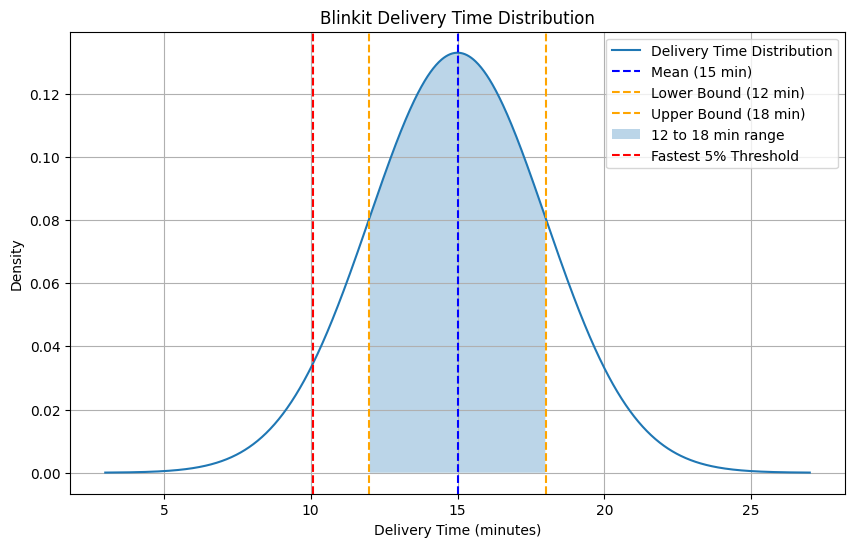

In [13]:
# Parameters for delivery times
mu = 15  # Mean delivery time (minutes)
sigma = 3  # Standard deviation (minutes)

# Define range for x-axis
# Values from (μ - 4σ) to (μ + 4σ)
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
y = norm.pdf(x, mu, sigma)

# Define bounds for shading
lower_bound = 12
upper_bound = 18

# Calculate z-scores for the bounds
z_lower = (lower_bound - mu) / sigma
z_upper = (upper_bound - mu) / sigma

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Delivery Time Distribution")
plt.axvline(mu, color="blue", linestyle="--", label="Mean (15 min)")
plt.axvline(lower_bound, color="orange", linestyle="--",
            label="Lower Bound (12 min)")
plt.axvline(upper_bound, color="orange", linestyle="--",
            label="Upper Bound (18 min)")

# Highlight the range between bounds
plt.fill_between(x, y, where=(x >= lower_bound) & (
    x <= upper_bound), alpha=0.3, label="12 to 18 min range")

# Mark the fastest 5% threshold
fastest_5_percent_z = norm.ppf(0.05)  # Z-score for the bottom 5%
fastest_5_percent_time = mu + fastest_5_percent_z * sigma
plt.axvline(fastest_5_percent_time, color="red",
            linestyle="--", label="Fastest 5% Threshold")

# Graph details
plt.title("Blinkit Delivery Time Distribution")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()


## Real-World Example: T-shirt Order Fulfillment

Imagine a company fulfilling T-shirt orders. Delivery times follow a normal distribution with a mean (μ) of 3 days and a standard deviation (σ) of 0.5 days.

### Questions:
1. What percentage of orders are delivered within 2.5 to 3.5 days?
2. How many orders are delayed beyond 4 days?

### Calculations and Visualizations


In [ ]:

# Parameters for the example
mu = 3  # Mean delivery time (days)
sigma = 0.5  # Standard deviation (days)

# Question 1: Percentage of deliveries within 2.5 to 3.5 days
lower_bound = 2.5
upper_bound = 3.5
prob_within_range = norm.cdf(upper_bound, mu, sigma) - norm.cdf(lower_bound, mu, sigma) #What Does It Mean in Simple Terms?
# It calculates the area under the curve of the normal distribution between the two bounds (
# lower_bound
# lower_bound and 
# upper_bound
# upper_bound). This area corresponds to the probability that a randomly chosen value falls within this range.
print(f"Percentage of deliveries within 2.5 to 3.5 days: {prob_within_range * 100:.2f}%")

# Question 2: Percentage of delayed deliveries beyond 4 days
delayed_prob = 1 - norm.cdf(4, mu, sigma)
print(f"Percentage of delayed deliveries beyond 4 days: {delayed_prob * 100:.2f}%")


Percentage of deliveries within 2.5 to 3.5 days: 68.27%
Percentage of delayed deliveries beyond 4 days: 2.28%



## Real-World Example: Using Height Distribution for T-shirt Orders

To optimize T-shirt sizes, a company considers the **height distribution** of a population. Heights are assumed to follow a **Normal Distribution** with:
- Mean height (μ): **170 cm**
- Standard deviation (σ): **10 cm**

### Objective:
To determine the proportion of customers requiring Small (S), Medium (M), and Large (L) T-shirts based on the following height ranges:
- **Small (S)**: Heights below 160 cm.
- **Medium (M)**: Heights between 160 cm and 180 cm.
- **Large (L)**: Heights above 180 cm.

### Calculations and Insights


Percentage of Small size orders: 15.87%
Percentage of Medium size orders: 68.27%
Percentage of Large size orders: 15.87%


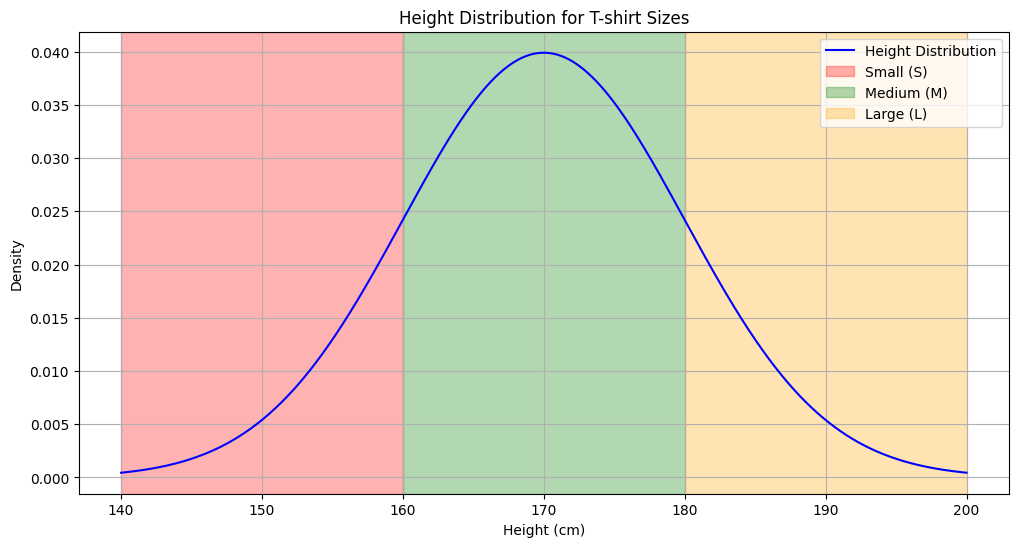

In [17]:

# Parameters for height distribution
mu = 170  # Mean height in cm
sigma = 10  # Standard deviation in cm

# Calculate proportions for each size
small_prob = norm.cdf(160, mu, sigma)  # Heights below 160 cm (Small)
# Heights between 160-180 cm (Medium)
medium_prob = norm.cdf(180, mu, sigma) - norm.cdf(160, mu, sigma)
large_prob = 1 - norm.cdf(180, mu, sigma)  # Heights above 180 cm (Large)

# Print proportions
print(f"Percentage of Small size orders: {small_prob * 100:.2f}%")
print(f"Percentage of Medium size orders: {medium_prob * 100:.2f}%")
print(f"Percentage of Large size orders: {large_prob * 100:.2f}%")

# Visualization of height distribution and size ranges
x = np.linspace(140, 200, 1000)
y = norm.pdf(x, mu, sigma)

plt.figure(figsize=(12, 6))
plt.plot(x, y, label="Height Distribution", color='blue')
plt.axvspan(140, 160, color='red', alpha=0.3, label="Small (S)")
plt.axvspan(160, 180, color='green', alpha=0.3, label="Medium (M)")
plt.axvspan(180, 200, color='orange', alpha=0.3, label="Large (L)")
plt.title("Height Distribution for T-shirt Sizes")
plt.xlabel("Height (cm)")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()